In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import random
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

2023-11-06 11:55:21.403534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
results = pd.read_csv("preds_1st_fold/Ensamble2.csv")
results["time"] = pd.to_datetime(results["time"])
comparisonA = results[results["location"].apply(lambda loc : loc == "A")]
comparisonB = results[results["location"].apply(lambda loc : loc == "B")]
comparisonC = results[results["location"].apply(lambda loc : loc == "C")]

<Axes: title={'center': 'C'}, xlabel='time'>

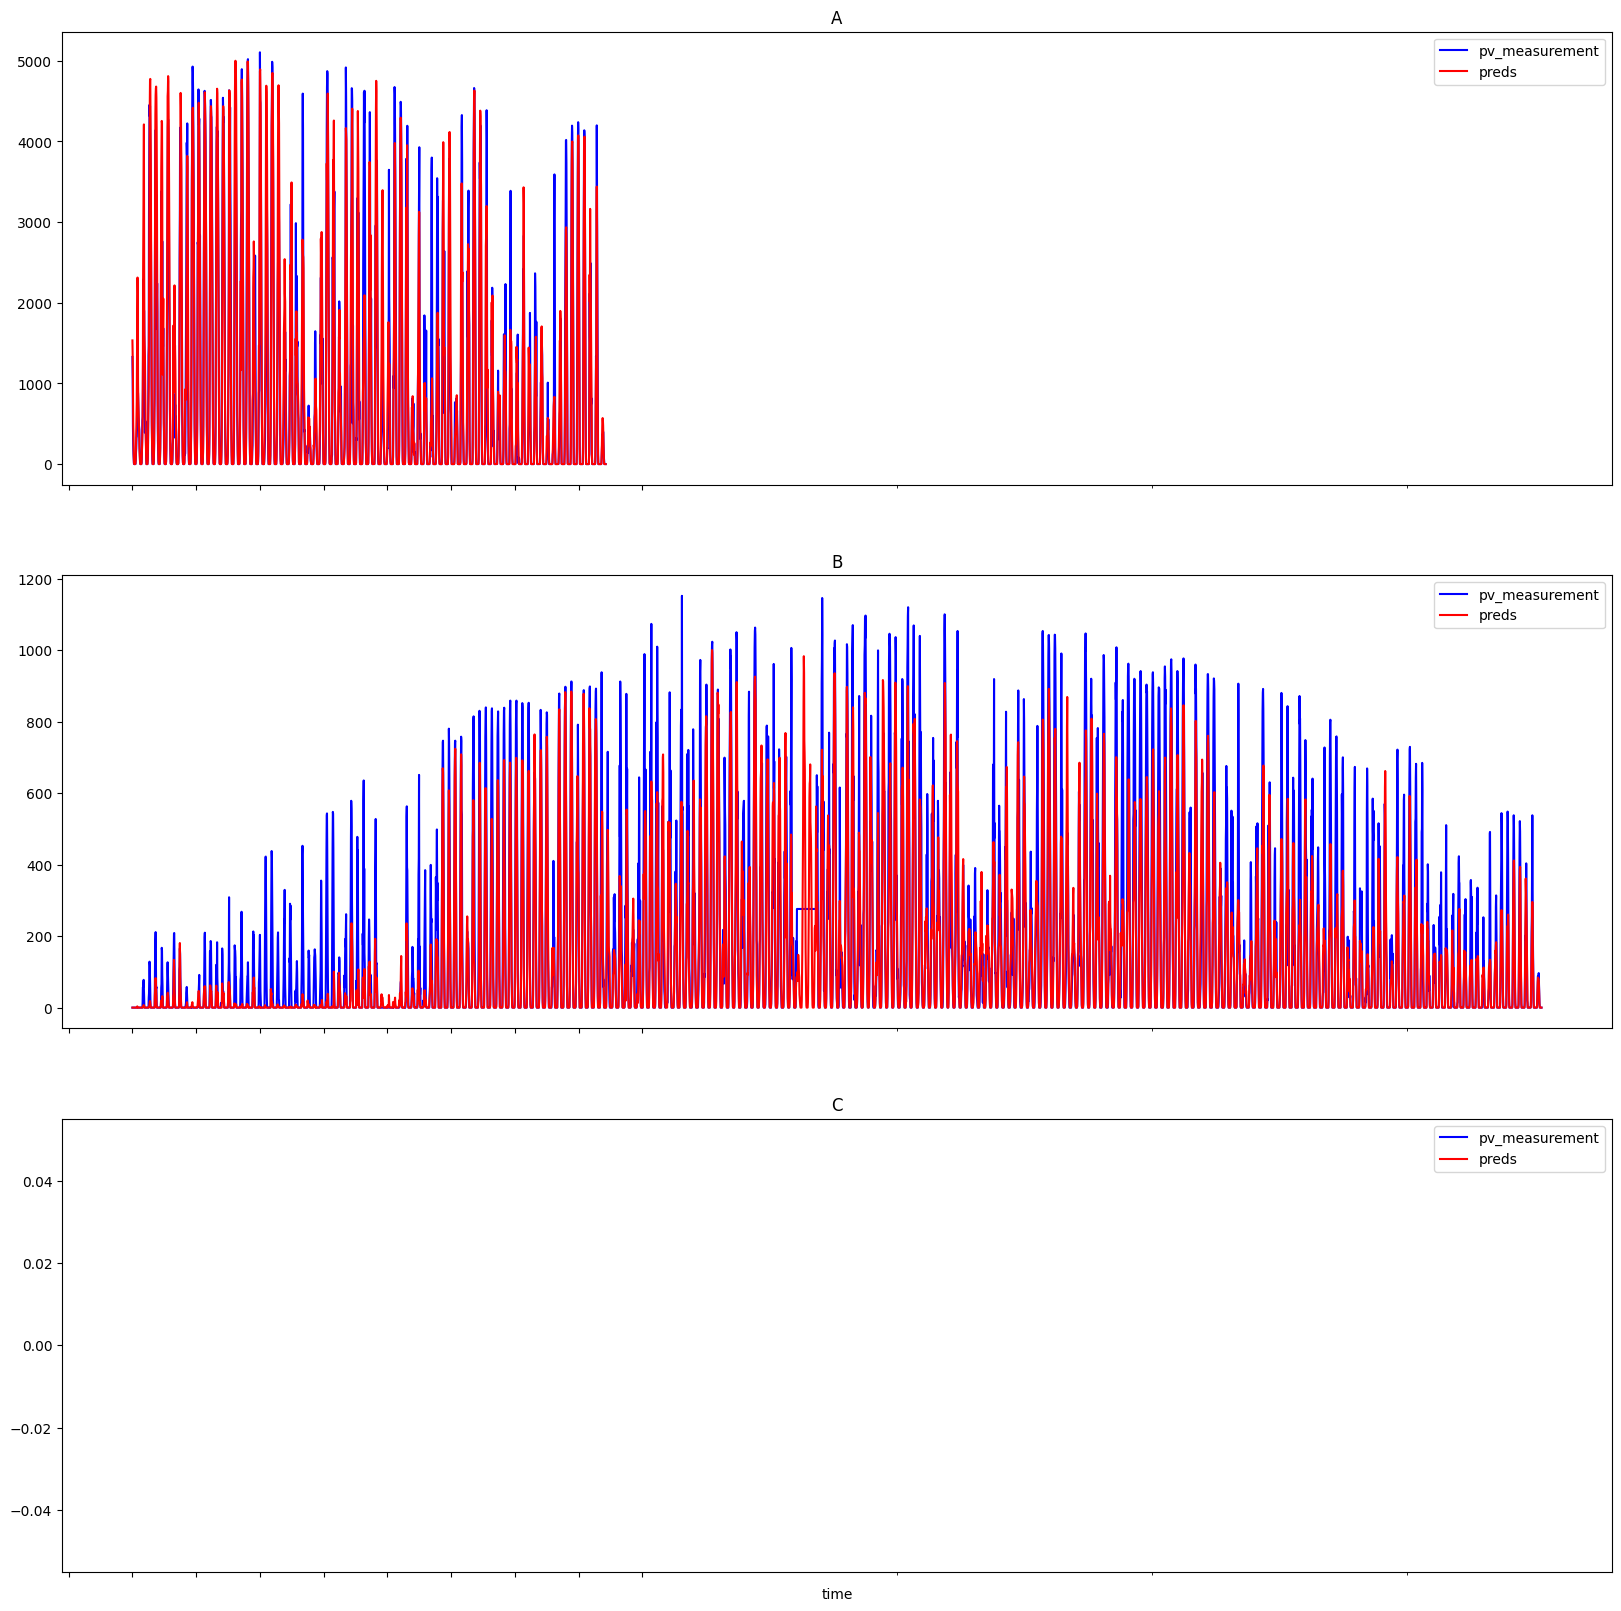

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(20, 20), sharex=True)

comparisonA.iloc[1000:][['time', 'pv_measurement']].set_index('time').plot(ax=axs[0], title='A', color='blue')
comparisonA.iloc[1000:][['time', "preds"]].set_index('time').plot(ax=axs[0], title='A', color='red')
comparisonB.iloc[1000:][['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='B', color='blue')
comparisonB.iloc[1000:][['time', "preds"]].set_index('time').plot(ax=axs[1], title='B', color='red')
comparisonC.iloc[1000:][['time', 'pv_measurement']].set_index('time').plot(ax=axs[2], title='C', color='blue')
comparisonC.iloc[1000:][['time', "preds"]].set_index('time').plot(ax=axs[2], title='C', color='red')